In [1]:
import pandas as pd
# Load CSV data
df = pd.read_csv('test.csv')

# List of month names
months = [
    "genero", "janeiro", "fevereiro", "março", "abril", "maio", "junho", "julho", "agosto", "setembro", "outubro", "novembro", "dezembro"
]

columns_to_convert = df.columns[1:]  # Select all columns except the first
df[columns_to_convert] = df[columns_to_convert].apply(
    lambda col: pd.to_numeric(col.str.replace(",", "."), errors="coerce")
)

# Filter the DataFrame to include only the columns with month names
df_filtered = df[months]

# Save the filtered DataFrame back to a new CSV if needed
df_filtered.to_csv("test2.csv", index=False)

print(df_filtered)


                     genero  janeiro  fevereiro  março  abril  maio  junho  \
0                   arrocha     10.7        6.1    4.4   10.0   9.4    9.5   
1                 sertanejo     10.7       11.0   11.0   11.0  10.3   10.7   
2   sertanejo universitario     10.7       11.0   11.0   11.0  10.3   11.0   
3                  agronejo      9.7       10.4   11.0   11.0   9.6   10.0   
4             sertanejo pop      6.2        9.7   10.3    8.9   8.9    9.3   
5              pop nacional      2.4        3.7    1.0    3.1   4.5    3.8   
6                      funk      3.6        1.6    2.5    3.1   5.7    6.8   
7              funk carioca      3.6        1.0    1.6    1.0   1.5    4.0   
8                     forro     10.1        5.8    4.4    8.7   9.4    9.5   
9                    pagode      8.0        5.8    1.7    6.6   0.3    8.0   
10              pagode novo      8.0        3.1    1.7    6.6   7.3    8.0   
11    sertanejo tradicional      7.3        8.0    8.0    8.0   

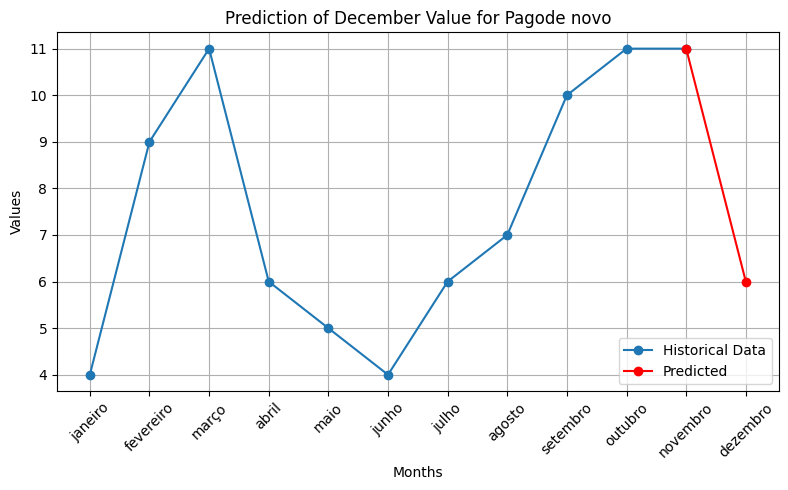

Predicted value for December for pagode novo: 6.598957538604736


In [2]:
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def predict_and_plot_xgb(genre, df):
    # Check if genre exists
    if genre not in df["genero"].values:
        print(f"Genre '{genre}' not found in the DataFrame.")
        return

    # Filter the data for the selected genre
    genre_data = df[df["genero"] == genre].iloc[0]

    months = [
        "janeiro", "fevereiro", "março", "abril", "maio", "junho", "julho", "agosto", "setembro", "outubro", "novembro"
    ]
    values = genre_data[months].values

    # Create lag features (previous month's values)
    X_train = []
    y_train = []
    for i in range(1, len(months)):
        X_train.append([values[i-1]])  # Previous month value as feature
        y_train.append(values[i])     # Current month value as target

    # Convert to numpy arrays for XGBoost
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    # Initialize and fit the XGBoost regressor
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)

    # Now predict the value for May, using the last month's value as input
    predicted_value = model.predict([[values[-1]]])[0]  # Last month's value as input

    # Prepare data for plotting
    months_extended = months + ["dezembro"]
    values_extended = list(values) + [predicted_value]

    # Plot the historical and predicted values
    plt.figure(figsize=(8, 5))
    plt.plot(months, 12-np.floor(values), marker="o", label="Historical Data", linestyle="-")
    plt.plot(months_extended[-2:], 12-np.floor(values_extended[-2:]), marker="o", color="red", label="Predicted")

    # Customize the plot
    plt.title(f"Prediction of December Value for {genre.capitalize()}")
    plt.xlabel("Months")
    plt.ylabel("Values")
    plt.xticks(rotation=45)
    plt.grid(alpha=1)
    plt.legend()
    plt.tight_layout()

    # Show the plot
    plt.show()

    print(f"Predicted value for December for {genre}: {predicted_value}")

# Example usage
predict_and_plot_xgb("pagode novo", df_filtered)


In [3]:
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def predict_and_plot_xgb_with_accuracy(genre, df):
    # Check if genre exists
    if genre not in df["genero"].values:
        print(f"Genre '{genre}' not found in the DataFrame.")
        return

    # Filter the data for the selected genre
    genre_data = df[df["genero"] == genre].iloc[0]

    # Extract months and handle zeros
    months = [
        "janeiro", "fevereiro", "março", "abril", "maio", "junho", "julho", "agosto", "setembro", "outubro", "novembro"
    ]
    values = genre_data[months].values

    # Actual May value (assuming it's available in the dataset)
    actual_december_value = genre_data.get("dezembro", None)

    # Create lag features (previous month's values)
    X_train = []
    y_train = []
    for i in range(1, len(months)):
        X_train.append([values[i-1]])  # Previous month value as feature
        y_train.append(values[i])     # Current month value as target

    # Convert to numpy arrays for XGBoost
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    # Initialize and fit the XGBoost regressor
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)

    # Now predict the value for May, using the last month's value as input
    predicted_value = model.predict([[values[-1]]])[0]  # Last month's value as input

    if actual_december_value is not None:
        # Calculate MSE and MAE
        mse = mean_squared_error([actual_december_value], [predicted_value])
        mae = mean_absolute_error([actual_december_value], [predicted_value])

        print(f"Actual value for December for {genre}: {actual_december_value}")
        print(f"Predicted value for December for {genre}: {predicted_value}")
        print(f"Mean Squared Error (MSE): {mse}")
        print(f"Mean Absolute Error (MAE): {mae}")
    else:
        print(f"Actual value for December is not available for {genre}. Unable to calculate accuracy.")

for genre in df_filtered["genero"].unique():
    predict_and_plot_xgb_with_accuracy(genre, df_filtered)


Actual value for December for arrocha: 9.6
Predicted value for December for arrocha: 6.8005218505859375
Mean Squared Error (MSE): 7.837077909046782
Mean Absolute Error (MAE): 2.799478149414062
Actual value for December for sertanejo: 11.0
Predicted value for December for sertanejo: 10.50062084197998
Mean Squared Error (MSE): 0.24937954346478364
Mean Absolute Error (MAE): 0.49937915802001953
Actual value for December for sertanejo universitario: 11.0
Predicted value for December for sertanejo universitario: 10.550799369812012
Mean Squared Error (MSE): 0.2017812061612858
Mean Absolute Error (MAE): 0.4492006301879883
Actual value for December for agronejo: 10.3
Predicted value for December for agronejo: 10.001226425170898
Mean Squared Error (MSE): 0.08926564901616117
Mean Absolute Error (MAE): 0.2987735748291023
Actual value for December for sertanejo pop: 11.0
Predicted value for December for sertanejo pop: 10.266200065612793
Mean Squared Error (MSE): 0.5384623437066693
Mean Absolute Err

In [4]:
# Sample data with genre names and corresponding MAE values
genres = [
    ("arrocha", 2.799478149414062),
    ("sertanejo", 0.49937915802001953),
    ("sertanejo universitario", 0.4492006301879883),
    ("agronejo", 0.2987735748291023),
    ("sertanejo pop", 0.733799934387207),
    ("pop nacional", 0.3498006343841553),
    ("funk", 0.10004601478576625),
    ("funk carioca", 0.5999952316284181),
    ("forro", 5.89885778427124),
    ("pagode", 0.6001951217651369),
    ("pagode novo", 0.6010424613952638),
    ("sertanejo tradicional", 0.6991936683654787),
    ("oktoberfest", 0.0015486478805541992),
    ("pop lgbtq+ brasileira", 0.17489297389984126),
    ("mpb", 2.100672721862793),
    ("brazilian soul", 2.1009507179260254),
    ("brazilian boogie", 2.1009507179260254),
    ("axe", 0.8200887441635132),
    ("rave funk", 1.6998167991638184),
    ("arrochadeira", 0.5985533237457275),
    ("musica tocantinense", 4.599613451957703),
    ("piseiro", 0.8198333740234376)
]

# Define the threshold for good and bad errors
threshold = 1.0

# Initialize counters
good_count = 0
bad_count = 0

good = []
bad=[]
# Classify each genre based on its MAE
for genre, mae in genres:
    if mae <= threshold:
        good_count += 1
        good.append(genre)
    else:
        bad_count += 1
        bad.append(genre)

# Display the results
print(f"Good error genres: {good_count}")
print(good)
print(f"Bad error genres: {bad_count}")
print(bad)


Good error genres: 15
['sertanejo', 'sertanejo universitario', 'agronejo', 'sertanejo pop', 'pop nacional', 'funk', 'funk carioca', 'pagode', 'pagode novo', 'sertanejo tradicional', 'oktoberfest', 'pop lgbtq+ brasileira', 'axe', 'arrochadeira', 'piseiro']
Bad error genres: 7
['arrocha', 'forro', 'mpb', 'brazilian soul', 'brazilian boogie', 'rave funk', 'musica tocantinense']


In [5]:
# Sample data with genre names and corresponding MSE values
genres = [
    ("arrocha", 7.837077909046782),
    ("sertanejo", 0.24937954346478364),
    ("sertanejo universitario", 0.2017812061612858),
    ("agronejo", 0.08926564901616117),
    ("sertanejo pop", 0.5384623437066693),
    ("pop nacional", 0.1223604838155575),
    ("funk", 0.010009205074513758),
    ("funk carioca", 0.359994277976839),
    ("forro", 34.79652315905741),
    ("pagode", 0.3602341841906675),
    ("pagode novo", 0.36125204040007725),
    ("sertanejo tradicional", 0.488871785882375),
    ("oktoberfest", 2.3983102579450133e-06),
    ("pop lgbtq+ brasileira", 0.03058755231953056),
    ("mpb", 4.412825884378435),
    ("brazilian soul", 4.4139939191538815),
    ("brazilian boogie", 4.4139939191538815),
    ("axe", 0.6725455483036882),
    ("rave funk", 2.889377150719529),
    ("arrochadeira", 0.3582660813670576),
    ("musica tocantinense", 21.156443907430255),
    ("piseiro", 0.6721267611626537)
]

# Define the threshold for good and bad MSE
threshold = 2.0

# Initialize counters
good_count = 0
bad_count = 0

# Classify each genre based on its MSE
for genre, mse in genres:
    if mse <= threshold:
        good_count += 1
    else:
        bad_count += 1

# Display the results
print(f"Good error genres (MSE <= {threshold}): {good_count}")
print(f"Bad error genres (MSE > {threshold}): {bad_count}")


Good error genres (MSE <= 2.0): 15
Bad error genres (MSE > 2.0): 7
